In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from operator import itemgetter
%matplotlib inline

In [2]:
train=pd.read_csv("./data/used_car_train_20200313.csv",sep=' ')
test=pd.read_csv("./data/testA.csv",sep=',')

In [3]:
print(train.shape)
print(test.shape)

(150000, 31)
(50000, 32)


In [4]:
del train['SaleID']
del test['SaleID']

In [5]:
train.columns

Index(['name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox',
       'power', 'kilometer', 'notRepairedDamage', 'regionCode', 'seller',
       'offerType', 'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4',
       'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13',
       'v_14'],
      dtype='object')

In [6]:
test.columns

Index(['Unnamed: 0', 'name', 'regDate', 'model', 'brand', 'bodyType',
       'fuelType', 'gearbox', 'power', 'kilometer', 'notRepairedDamage',
       'regionCode', 'seller', 'offerType', 'creatDate', 'v_0', 'v_1', 'v_2',
       'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14', 'price'],
      dtype='object')

In [7]:
del test['Unnamed: 0']

In [8]:
# 这里我包装了一个异常值处理的代码，可以随便调用。
def outliers_proc(data, col_name, scale=3):
    def box_plot_outliers(data_ser, box_scale):
        iqr = box_scale * (data_ser.quantile(0.75) - data_ser.quantile(0.25))
        val_low = data_ser.quantile(0.25) - iqr
        val_up = data_ser.quantile(0.75) + iqr
        rule_low = (data_ser < val_low)
        rule_up = (data_ser > val_up)
        return (rule_low, rule_up), (val_low, val_up)
    data_n = data.copy()
    data_series = data_n[col_name]
    rule, value = box_plot_outliers(data_series, box_scale=scale)
    index = np.arange(data_series.shape[0])[rule[0] | rule[1]]
    print("Delete number is: {}".format(len(index)))
    data_n = data_n.drop(index)
    data_n.reset_index(drop=True, inplace=True)
    print("Now column number is: {}".format(data_n.shape[0]))
    index_low = np.arange(data_series.shape[0])[rule[0]]
    outliers = data_series.iloc[index_low]
    print("Description of data less than the lower bound is:")
    print(pd.Series(outliers).describe())
    index_up = np.arange(data_series.shape[0])[rule[1]]
    outliers = data_series.iloc[index_up]
    print("Description of data larger than the upper bound is:")
    print(pd.Series(outliers).describe())
    fig, ax = plt.subplots(1, 2, figsize=(10, 7))
    sns.boxplot(y=data[col_name], data=data, palette="Set1", ax=ax[0])
    sns.boxplot(y=data_n[col_name], data=data_n, palette="Set1", ax=ax[1])
    return data_n
    

In [9]:
train

,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,0.0,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,-,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,0.0,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,0.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,0.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
5,137642,20090602,24.0,10,0.0,1.0,0.0,109,10.0,0.0,...,0.260246,0.000518,0.119838,0.090922,0.048769,1.885526,-2.721943,2.457660,-0.286973,0.206573
6,2402,19990411,13.0,4,0.0,0.0,1.0,150,15.0,0.0,...,0.267998,0.117675,0.142334,0.025446,0.028174,-4.902200,1.610616,-0.834605,-1.996117,-0.103180
7,165346,19990706,26.0,14,1.0,0.0,0.0,101,15.0,0.0,...,0.239506,0.000000,0.122943,0.039839,0.082413,3.693829,-0.245014,-2.192810,0.236728,0.195567
8,2974,20030205,19.0,1,2.0,1.0,1.0,179,15.0,0.0,...,0.263833,0.116583,0.144255,0.039851,0.024388,-4.925234,1.587796,0.075348,-1.551098,0.069433
9,82021,19980101,7.0,7,5.0,0.0,0.0,88,15.0,0.0,...,0.262473,0.068267,0.012176,0.010291,0.098727,-1.089584,0.600683,-4.186210,0.198273,-1.025822


Delete number is: 963
Now column number is: 149037
Description of data less than the lower bound is:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: power, dtype: float64
Description of data larger than the upper bound is:
count      963.000000
mean       846.836968
std       1929.418081
min        376.000000
25%        400.000000
50%        436.000000
75%        514.000000
max      19312.000000
Name: power, dtype: float64


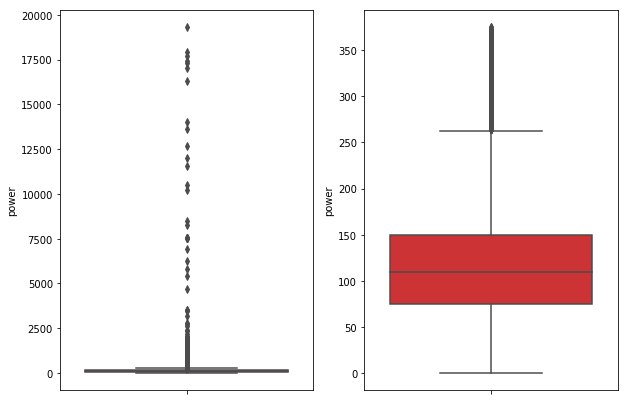

In [10]:
# 我们可以删掉一些异常数据，以 power 为例。
# 这里删不删同学可以自行判断
# 但是要注意 test 的数据不能删 = = 不能掩耳盗铃是不是
train = outliers_proc(train, 'power', scale=3)

In [11]:
train['train']=1
test['train']=0
data=pd.concat([train,test],ignore_index=True,sort=False)

In [12]:
# 使用时间：data['creatDate'] - data['regDate']，反应汽车使用时间，一般来说价格与使用时间成反比
# 不过要注意，数据里有时间出错的格式，所以我们需要 errors='coerce
data['used_time']=(pd.to_datetime(data['creatDate'],format='%Y%m%d',errors='coerce'))-(pd.to_datetime(data['regDate'],format='%Y%m%d',errors='coerce'))

In [13]:
data['used_time']

0        4385 days
1        4757 days
2        4382 days
3        7125 days
4        1531 days
5        2482 days
6        6185 days
7        6108 days
8        4798 days
9        6666 days
10       3874 days
11       2936 days
12       5493 days
13       4154 days
14             NaT
15       6260 days
16       1638 days
17       3896 days
18       6363 days
19       5866 days
20             NaT
21       4925 days
22             NaT
23       8021 days
24       1603 days
25       3712 days
26       5112 days
27       5226 days
28       6159 days
29       4538 days
            ...   
199007   5054 days
199008   6799 days
199009   5928 days
199010   3012 days
199011   5793 days
199012   5173 days
199013   4004 days
199014   7078 days
199015   7421 days
199016   2812 days
199017   1719 days
199018   1692 days
199019   3489 days
199020   2036 days
199021   5260 days
199022   2881 days
199023   7092 days
199024   7675 days
199025   3664 days
199026   4147 days
199027   6051 days
199028   453

In [19]:
data['used_time'].isnull().any()

True

In [21]:
data['used_time']

0         4385.0
1         4757.0
2         4382.0
3         7125.0
4         1531.0
5         2482.0
6         6185.0
7         6108.0
8         4798.0
9         6666.0
10        3874.0
11        2936.0
12        5493.0
13        4154.0
14           NaN
15        6260.0
16        1638.0
17        3896.0
18        6363.0
19        5866.0
20           NaN
21        4925.0
22           NaN
23        8021.0
24        1603.0
25        3712.0
26        5112.0
27        5226.0
28        6159.0
29        4538.0
           ...  
199007    5054.0
199008    6799.0
199009    5928.0
199010    3012.0
199011    5793.0
199012    5173.0
199013    4004.0
199014    7078.0
199015    7421.0
199016    2812.0
199017    1719.0
199018    1692.0
199019    3489.0
199020    2036.0
199021    5260.0
199022    2881.0
199023    7092.0
199024    7675.0
199025    3664.0
199026    4147.0
199027    6051.0
199028    4532.0
199029    3096.0
199030    6834.0
199031    3888.0
199032    4173.0
199033    1079.0
199034    4113

In [18]:
data['used_time']=data['used_time'].map(lambda x:x.days)

In [16]:
data['city']=data['regionCode'].apply(lambda x:str(x)[:-3])

In [17]:
data['city'].isnull().sum()

0

In [22]:
train_gd=train.groupby('brand')
all_info={}
for kind,kind_data in train_gd:
    info={}
    kind_data=kind_data[kind_data['price']>0]
    info['brand_amount']=len(kind_data)
    info['brand_price_max']=kind_data.price.max()
    info['brand_price_medina']=kind_data.price.median()
    info['brand_price_min']=kind_data.price.min()
    info['brand_price_sum']=kind_data.price.sum()
    info['brand_price_std']=kind_data.price.std()
    info['brand_price_average']=round(kind_data.price.sum()/(len(kind_data)+1),2)
    all_info[kind]=info
brand_fe=pd.DataFrame(all_info).T.reset_index().rename(columns={"index":"brand"})
data=data.merge(brand_fe,how='left',on='brand')

In [23]:
# 数据分桶 以 power 为例
# 这时候我们的缺失值也进桶了，
# 为什么要做数据分桶呢，原因有很多，= =
# 1. 离散后稀疏向量内积乘法运算速度更快，计算结果也方便存储，容易扩展；
# 2. 离散后的特征对异常值更具鲁棒性，如 age>30 为 1 否则为 0，对于年龄为 200 的也不会对模型造成很大的
# 3. LR 属于广义线性模型，表达能力有限，经过离散化后，每个变量有单独的权重，这相当于引入了非线性，能
# 4. 离散后特征可以进行特征交叉，提升表达能力，由 M+N 个变量编程 M*N 个变量，进一步引入非线形，提升了
# 5. 特征离散后模型更稳定，如用户年龄区间，不会因为用户年龄长了一岁就变化
# 当然还有很多原因，LightGBM 在改进 XGBoost 时就增加了数据分桶，增强了模型的泛化性
bin=[i*10 for i in range(31)]
data['power_bin']=pd.cut(data['power'],bin,labels=False)
data[['power_bin', 'power']].head(20)

,power_bin,power
0,5.0,60
1,NaN,0
2,16.0,163
3,19.0,193
4,6.0,68
5,10.0,109
6,14.0,150
7,10.0,101
8,17.0,179
9,8.0,88


In [24]:
data = data.drop(['creatDate', 'regDate', 'regionCode'], axis=1)

In [25]:
print(data.shape)
data.columns

(199037, 37)


Index(['name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'power',
       'kilometer', 'notRepairedDamage', 'seller', 'offerType', 'price', 'v_0',
       'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10',
       'v_11', 'v_12', 'v_13', 'v_14', 'train', 'used_time', 'brand_amount',
       'brand_price_average', 'brand_price_max', 'brand_price_medina',
       'brand_price_min', 'brand_price_std', 'brand_price_sum', 'power_bin'],
      dtype='object')

In [26]:
# 目前的数据其实已经可以给树模型使用了，所以我们导出一下
data.to_csv('data_for_tree.csv', index=0)

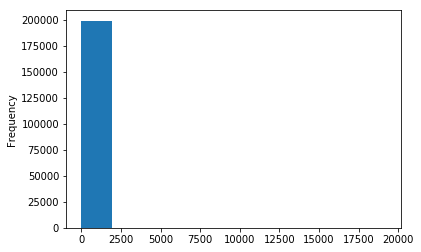

In [23]:
# 我们可以再构造一份特征给 LR NN 之类的模型用
# 之所以分开构造是因为，不同模型对数据集的要求不同
# 我们看下数据分布：
data['power'].plot.hist()

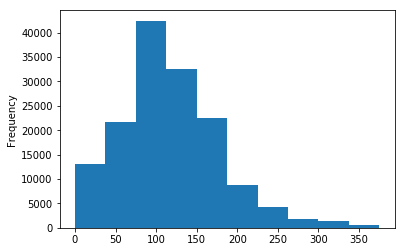

In [24]:
# 我们刚刚已经对 train 进行异常值处理了，但是现在还有这么奇怪的分布是因为 test 中的 power 异常值，
# 所以我们其实刚刚 train 中的 power 异常值不删为好，可以用长尾分布截断来代替
train['power'].plot.hist()

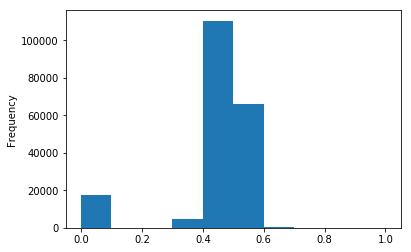

In [25]:
# 我们对其取 log，在做归一化
from sklearn import preprocessing
min_max_scaler=preprocessing.MinMaxScaler()
data['power']=np.log(data['power']+1)
data['power']=(data['power']-np.min(data['power']))/(np.max(data['power'])-np.min(data['power']))
data['power'].plot.hist()

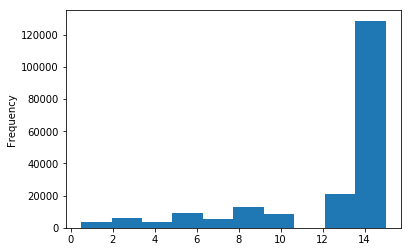

In [26]:
# km 的比较正常，应该是已经做过分桶了
data['kilometer'].plot.hist()

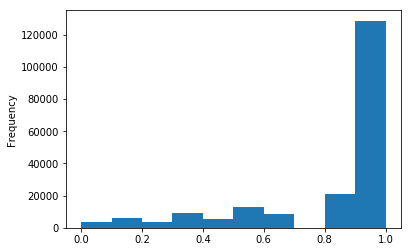

In [27]:
# 所以我们可以直接做归一化
data['kilometer'] = ((data['kilometer'] - np.min(data['kilometer'])) /
(np.max(data['kilometer']) - np.min(data['kilometer'])))
data['kilometer'].plot.hist()

In [28]:
# 除此之外 还有我们刚刚构造的统计量特征：
# 'brand_amount', 'brand_price_average', 'brand_price_max',
# 'brand_price_median', 'brand_price_min', 'brand_price_std',
# 'brand_price_sum'
# 这里不再一一举例分析了，直接做变换，
def max_min(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))
data['brand_amount'] = ((data['brand_amount'] - np.min(data['brand_amount'])) /
    (np.max(data['brand_amount']) - np.min(data['brand_amount'])))
data['brand_price_average'] = ((data['brand_price_average'] - np.min(data['brand_price_average'])) /
    (np.max(data['brand_price_average']) - np.min(data['brand_price_average'])))
data['brand_price_max'] = ((data['brand_price_max'] - np.min(data['brand_price_max'])) /
    (np.max(data['brand_price_max']) - np.min(data['brand_price_max'])))
data['brand_price_medina'] = ((data['brand_price_medina'] - np.min(data['brand_price_medina'])) /
    (np.max(data['brand_price_medina']) - np.min(data['brand_price_medina'])))
data['brand_price_min'] = ((data['brand_price_min'] - np.min(data['brand_price_min'])) /
    (np.max(data['brand_price_min']) - np.min(data['brand_price_min'])))
data['brand_price_std'] = ((data['brand_price_std'] - np.min(data['brand_price_std'])) /
    (np.max(data['brand_price_std']) - np.min(data['brand_price_std'])))
data['brand_price_sum'] = ((data['brand_price_sum'] - np.min(data['brand_price_sum'])) /
    (np.max(data['brand_price_sum']) - np.min(data['brand_price_sum'])))

In [29]:
# 对类别特征进行 OneEncoder
data = pd.get_dummies(data, columns=['model', 'brand', 'bodyType', 'fuelType',
'gearbox', 'notRepairedDamage', 'power_bin'])

In [30]:
print(data.shape)
data.columns

(199037, 369)


Index(['name', 'power', 'kilometer', 'seller', 'offerType', 'price', 'v_0',
       'v_1', 'v_2', 'v_3',
       ...
       'power_bin_20.0', 'power_bin_21.0', 'power_bin_22.0', 'power_bin_23.0',
       'power_bin_24.0', 'power_bin_25.0', 'power_bin_26.0', 'power_bin_27.0',
       'power_bin_28.0', 'power_bin_29.0'],
      dtype='object', length=369)

In [31]:
data['brand_price_median']=data['brand_price_medina']
del data['brand_price_medina']

In [45]:
# 这份数据可以给 LR 用
data.to_csv('data_for_lr.csv', index=0)

In [46]:
print(data['power'].corr(data['price'],method='spearman'))
print(data['kilometer'].corr(data['price'], method='spearman'))
print(data['brand_amount'].corr(data['price'], method='spearman'))
print(data['brand_price_average'].corr(data['price'], method='spearman'))
print(data['brand_price_max'].corr(data['price'], method='spearman'))
print(data['brand_price_median'].corr(data['price'], method='spearman'))

0.5728285196051496
-0.4082569701616764
0.058156610025581514
0.3834909576057687
0.259066833880992
0.38691042393409447


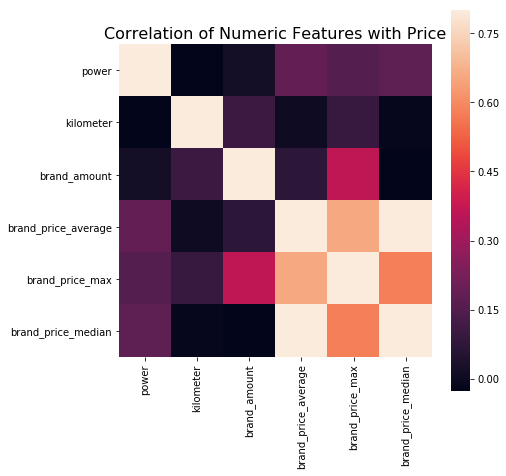

In [47]:
# 当然也可以直接看图
data_numeric = data[['power', 'kilometer', 'brand_amount', 'brand_price_average',
'brand_price_max', 'brand_price_median']]
correlation = data_numeric.corr()
f , ax = plt.subplots(figsize = (7, 7))
plt.title('Correlation of Numeric Features with Price',y=1,size=16)
sns.heatmap(correlation,square = True, vmax=0.8)

In [51]:
#包裹式
# k_feature 太大会很难跑，没服务器，所以提前 interrupt 了
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
sfs = SFS(LinearRegression(),
k_features=10,
forward=True,
floating=False,
scoring = 'r2',
cv = 0)
x = data.drop(['price'], axis=1)
x = x.fillna(0)
y = data['price']
sfs.fit(x, y)
sfs.k_feature_names_

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [52]:
# 画出来，可以看到边际效益
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.grid()
plt.show()

AttributeError: SequentialFeatureSelector has not been fitted, yet.